**Name:** Pratibha Gupta \
**Batch:** Afternoon, ML-14 \
**Data:** DailyTotalFemale Birth data





1)DailyTotalFemaleBirths
2)airline_passengers


Implement analysis on the above mentioned data. 
   a) SMA \
   b) WMA \
   c) single exponential smoothing  \
   d) double exponential smoothing   \
   e) Triple exponential smoothing   \
   f) check if data is stationary or not. If data is not stationary then implement differencing technique to make data stationary.    \
Split the data into train and test and check the accuracy of predicted/forecasted data.  \
Submit in PDF and .ipynb format

In [1]:
# Import Necessary Libarary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Female Birth data.
female_data=pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
female_data.head(5)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [3]:
female_data.shape

(365, 1)

### Checking Stationarity

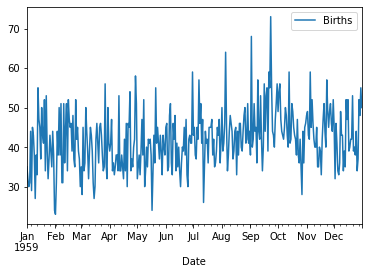

In [4]:
female_data.plot()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [6]:
data_test = adfuller(female_data['Births'], autolag='AIC')

dfoutput = pd.Series(data_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in data_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


- **Data is stationary as p_value<<0.05,0.01,0.1, we reject the null hypothesis and conclude that data is stationary.**

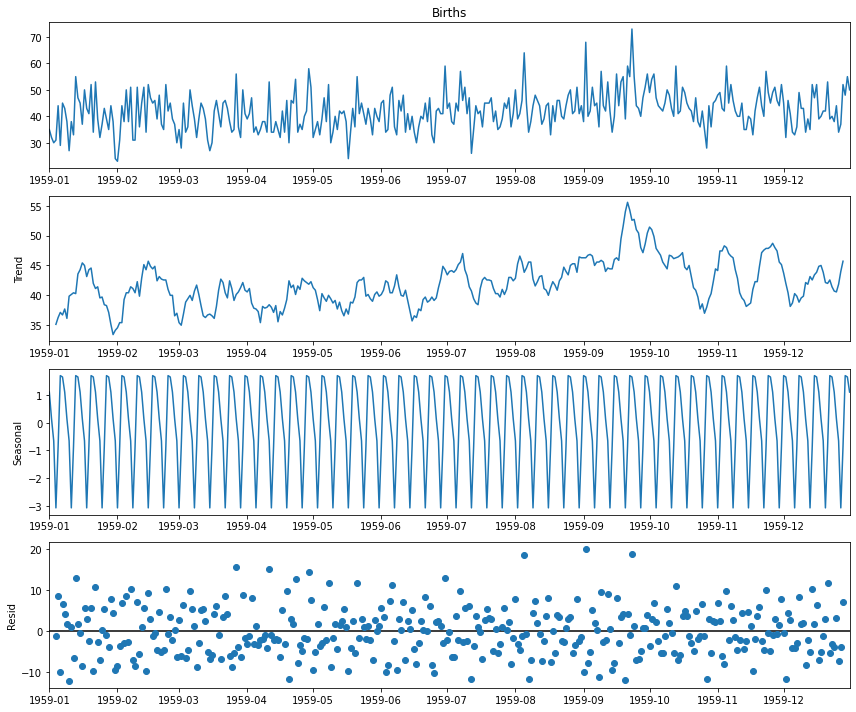

In [7]:
from pylab import rcParams
rcParams['figure.figsize']=12,10
decomposition=seasonal_decompose(female_data['Births'],model='additive')
fig=decomposition.plot()
plt.tight_layout()
plt.show()

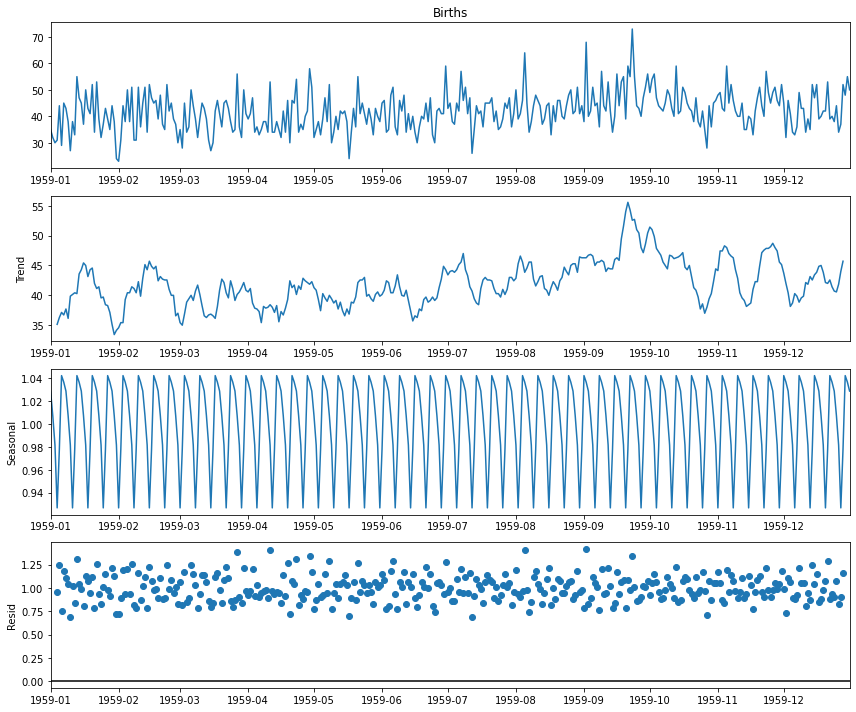

In [8]:
decomposition=seasonal_decompose(female_data['Births'],model='multiplicative')
fig=decomposition.plot()
plt.tight_layout()
plt.show()

- ***Absence of seasons. Data is not seasonal. But data is random.***

**Simple Moving Average and Weighted Moving Average**

In [9]:
female_data['3_month-SMA'] = female_data['Births'].rolling(window=3).mean()
female_data['6_month-SMA'] = female_data['Births'].rolling(window=6).mean()
female_data['12_month-SMA'] = female_data['Births'].rolling(window=12).mean()
female_data.head(4)

,Births,3_month-SMA,6_month-SMA,12_month-SMA
Date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,NaN,NaN,NaN
1959-01-03,30,32.333333,NaN,NaN
1959-01-04,31,31.000000,NaN,NaN


In [10]:
female_data['3_month-wma'] = female_data['Births'].ewm(span=3,adjust=False).mean()
female_data['6_month-wma'] = female_data['Births'].ewm(span=6,adjust=False).mean()
female_data['12_month-wma'] = female_data['Births'].ewm(span=12,adjust=False).mean()
female_data.head(4)

,Births,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma
Date,,,,,,,
1959-01-01,35,NaN,NaN,NaN,35.000,35.000000,35.000000
1959-01-02,32,NaN,NaN,NaN,33.500,34.142857,34.538462
1959-01-03,30,32.333333,NaN,NaN,31.750,32.959184,33.840237
1959-01-04,31,31.000000,NaN,NaN,31.375,32.399417,33.403277


Simple Exponential Smoothing/ Double Exponential Smoothing/ Triple Expoenential Smoothing

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

female_data['SES']=SimpleExpSmoothing(female_data['Births']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
female_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,Births,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES
Date,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,35.0000,35.000000,35.000000,35.000000
1959-01-02,32,NaN,NaN,NaN,33.5000,34.142857,34.538462,34.538462
1959-01-03,30,32.333333,NaN,NaN,31.7500,32.959184,33.840237,33.840237
1959-01-04,31,31.000000,NaN,NaN,31.3750,32.399417,33.403277,33.403277
1959-01-05,44,35.000000,NaN,NaN,37.6875,35.713869,35.033542,35.033542


In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

female_data['DES'] = ExponentialSmoothing(female_data['Births'], trend='add').fit().fittedvalues.shift(-1)
female_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,Births,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES,DES
Date,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,35.0000,35.000000,35.000000,35.000000,38.458684
1959-01-02,32,NaN,NaN,NaN,33.5000,34.142857,34.538462,34.538462,38.200409
1959-01-03,30,32.333333,NaN,NaN,31.7500,32.959184,33.840237,33.840237,37.868413
1959-01-04,31,31.000000,NaN,NaN,31.3750,32.399417,33.403277,33.403277,37.592796
1959-01-05,44,35.000000,NaN,NaN,37.6875,35.713869,35.033542,35.033542,37.879094


In [13]:
female_data['DESmul12'] = ExponentialSmoothing(female_data['Births'], trend='mul').fit().fittedvalues.shift(-1)
female_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,Births,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES,DES,DESmul12
Date,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,35.0000,35.000000,35.000000,35.000000,38.458684,38.506619
1959-01-02,32,NaN,NaN,NaN,33.5000,34.142857,34.538462,34.538462,38.200409,38.240639
1959-01-03,30,32.333333,NaN,NaN,31.7500,32.959184,33.840237,33.840237,37.868413,37.900376
1959-01-04,31,31.000000,NaN,NaN,31.3750,32.399417,33.403277,33.403277,37.592796,37.617352
1959-01-05,44,35.000000,NaN,NaN,37.6875,35.713869,35.033542,35.033542,37.879094,37.902602


In [14]:
female_data['TES12'] = ExponentialSmoothing(female_data['Births'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
female_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,Births,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES,DES,DESmul12,TES12
Date,,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,35.0000,35.000000,35.000000,35.000000,38.458684,38.506619,38.865541
1959-01-02,32,NaN,NaN,NaN,33.5000,34.142857,34.538462,34.538462,38.200409,38.240639,38.920759
1959-01-03,30,32.333333,NaN,NaN,31.7500,32.959184,33.840237,33.840237,37.868413,37.900376,37.164771
1959-01-04,31,31.000000,NaN,NaN,31.3750,32.399417,33.403277,33.403277,37.592796,37.617352,35.849648
1959-01-05,44,35.000000,NaN,NaN,37.6875,35.713869,35.033542,35.033542,37.879094,37.902602,39.602572


In [15]:
female_data['TESmul12'] = ExponentialSmoothing(female_data['Births'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
female_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


,Births,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES,DES,DESmul12,TES12,TESmul12
Date,,,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,35.0000,35.000000,35.000000,35.000000,38.458684,38.506619,38.865541,38.912607
1959-01-02,32,NaN,NaN,NaN,33.5000,34.142857,34.538462,34.538462,38.200409,38.240639,38.920759,39.001140
1959-01-03,30,32.333333,NaN,NaN,31.7500,32.959184,33.840237,33.840237,37.868413,37.900376,37.164771,37.366389
1959-01-04,31,31.000000,NaN,NaN,31.3750,32.399417,33.403277,33.403277,37.592796,37.617352,35.849648,36.062300
1959-01-05,44,35.000000,NaN,NaN,37.6875,35.713869,35.033542,35.033542,37.879094,37.902602,39.602572,39.170981


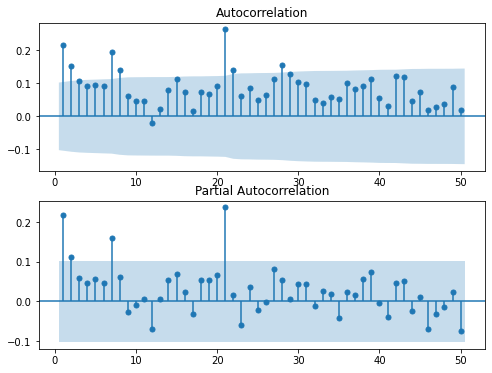

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(female_data['Births'], lags=50, alpha=0.05,zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(female_data['Births'], lags=50,alpha=0.05, zero=False, ax=ax2)
plt.show()


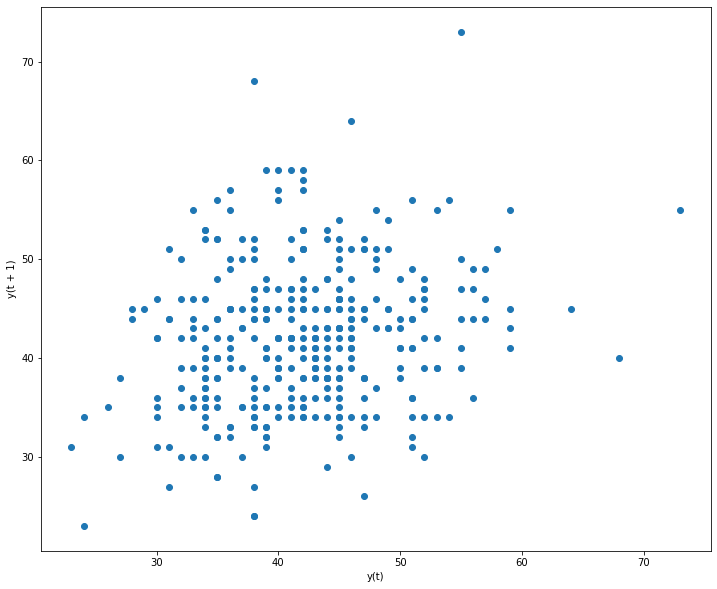

In [17]:
pd.plotting.lag_plot(female_data['Births']);

- Here data is dispersed, it doesn't show any kind of linearity in the behaviour of data. However showing some pattern that indicates weak autocorrelation is there.

In [18]:
from pmdarima import auto_arima
## Without Seasonality
stepwise_fit = auto_arima(female_data['Births'],
                          seasonal=False)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sat, 21 Aug 2021   AIC                           2459.074
Time:                        20:43:25   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
from pmdarima import auto_arima
## Without Seasonality
stepwise_fit = auto_arima(female_data['Births'],
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.904, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sat, 21 Aug 2021   AIC                           2459.074
Time:                        20:43:32   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
Train=female_data['Births'].iloc[:-50]
test=female_data['Births'].iloc[-50:]
print(Train.shape)
print(test.shape)

(315,)
(50,)


In [21]:
from statsmodels.tsa.arima_model import ARIMA
d = ARIMA(Train,order=(1,1,1))
d=d.fit()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [22]:
d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Births   No. Observations:                  314
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1060.944
Method:                       css-mle   S.D. of innovations              7.064
Date:                Sat, 21 Aug 2021   AIC                           2129.888
Time:                        20:43:33   BIC                           2144.886
Sample:                    01-02-1959   HQIC                          2135.881
                         - 11-11-1959                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0235      0.011      2.112      0.035       0.002       0.045
ar.L1.D.Births     0.1122      0.062      1.822      0.068      -0.008       0.233
ma.L1.D.Births    -0.9807      0.027    -36.642      0.000      -1.033      -0.928
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            8.9151           +0.0000j            8.9151            0.0000
MA.1            1.0197           +0.0000j            1.0197            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
start=len(Train)
end=len(Train)+len(test)-1
pred=d.predict(start=start,end=end,typ='levels').rename('ARMA(2,2) Predictions')
print(pred)

1959-11-12    45.148927
1959-11-13    45.747362
1959-11-14    45.835368
1959-11-15    45.866121
1959-11-16    45.890451
1959-11-17    45.914061
1959-11-18    45.937590
1959-11-19    45.961110
1959-11-20    45.984629
1959-11-21    46.008147
1959-11-22    46.031666
1959-11-23    46.055185
1959-11-24    46.078704
1959-11-25    46.102222
1959-11-26    46.125741
1959-11-27    46.149260
1959-11-28    46.172779
1959-11-29    46.196297
1959-11-30    46.219816
1959-12-01    46.243335
1959-12-02    46.266854
1959-12-03    46.290372
1959-12-04    46.313891
1959-12-05    46.337410
1959-12-06    46.360929
1959-12-07    46.384447
1959-12-08    46.407966
1959-12-09    46.431485
1959-12-10    46.455004
1959-12-11    46.478522
1959-12-12    46.502041
1959-12-13    46.525560
1959-12-14    46.549079
1959-12-15    46.572597
1959-12-16    46.596116
1959-12-17    46.619635
1959-12-18    46.643154
1959-12-19    46.666673
1959-12-20    46.690191
1959-12-21    46.713710
1959-12-22    46.737229
1959-12-23    46

<AxesSubplot:xlabel='Date'>

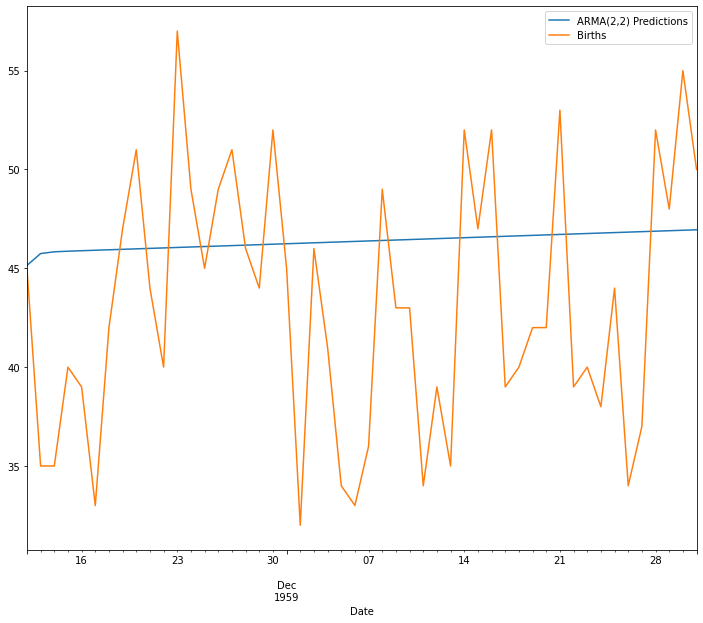

In [24]:
pred.plot(legend=True)
test.plot(legend=True)

In [25]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, pred)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

ARIMA(1,1,1) MSE Error: 52.18966756


In [26]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test, pred)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error:  7.22424166


In [31]:
model = ARIMA(female_data['Births'],order=(1,1,1))
results = model.fit()
forecast = results.predict(len(female_data),len(female_data)+48,typ='levels').rename('ARIMA(1,1,1) Forecast') #Prediction for 4years

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


[Text(0.5, 0, ''), Text(0, 0.5, 'Frequency')]

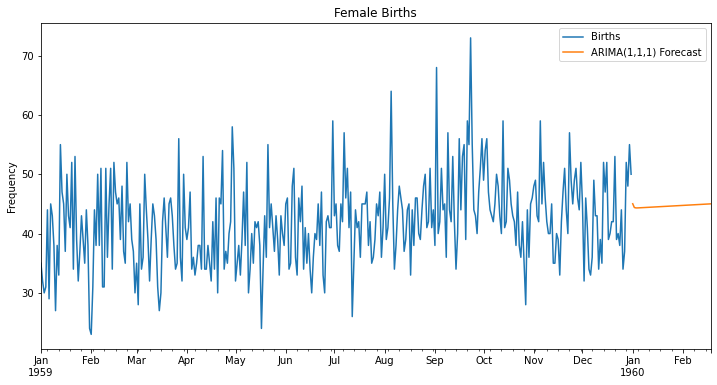

In [32]:
# Plot predictions against known values
title = 'Female Births'
ylabel='Frequency'
xlabel=''

ax = female_data['Births'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

https://www.geeksforgeeks.org/lag-plots/
https://www.statology.org/autocorrelation-python/#:~:text=We%20can%20plot%20the%20autocorrelation%20function%20for%20a,will%20always%20be%201%20at%20lag%20%3D%200.